In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import ndimage, fft
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('_Flux dataframe.csv')

print(df.shape)
df.head()

(100, 18106)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,18065,18066,18067,18068,18069,18070,18071,18072,18073,18074,18075,18076,18077,18078,18079,18080,18081,18082,18083,18084,18085,18086,18087,18088,18089,18090,18091,18092,18093,18094,18095,18096,18097,18098,18099,18100,18101,18102,18103,ID
0,flux,67386.929688,67462.570312,67448.406250,67490.835938,67454.820312,67467.164062,67495.328125,67537.914062,67496.867188,67539.250000,67483.578125,67495.773438,67508.726562,67469.976562,67492.937500,67498.656250,67501.648438,67514.695312,67526.656250,67517.828125,67481.929688,67533.390625,67496.773438,67495.867188,67492.218750,67525.421875,67548.429688,67507.484375,67514.664062,67523.890625,67507.296875,67560.343750,67484.289062,67510.992188,67534.531250,67484.421875,67507.328125,67447.492188,67441.578125,...,67546.390625,67519.445312,67498.664062,67558.156250,67527.367188,67525.500000,67597.421875,67480.382812,67498.515625,67529.828125,67546.320312,67475.296875,67493.273438,67514.359375,67527.828125,67521.148438,67548.546875,67502.382812,67509.601562,67507.320312,67526.445312,67528.835938,67526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139250626
1,flux,49035.625000,49115.289062,49069.714844,49091.937500,49097.925781,49099.984375,49090.464844,49087.765625,49116.824219,49095.539062,49091.964844,49103.585938,49101.582031,49134.437500,49110.417969,49133.246094,49145.414062,49092.531250,49058.667969,49086.500000,49076.875000,49096.304688,49123.808594,49124.886719,49102.722656,49138.003906,49097.917969,49076.058594,49116.222656,49108.015625,49126.191406,49016.882812,49075.226562,49064.281250,49103.382812,49075.453125,49099.085938,49059.804688,49075.531250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139281803
2,flux,84907.796875,85220.890625,85190.460938,85222.218750,85225.351562,85215.273438,85224.367188,85233.515625,85273.460938,85221.953125,85279.179688,85217.296875,85186.031250,85295.843750,85249.734375,85254.289062,85171.148438,85253.007812,85237.101562,85367.414062,85354.882812,85462.929688,85377.250000,85302.945312,85305.156250,85202.757812,85282.742188,85274.718750,85250.664062,85233.601562,85269.000000,85276.757812,85183.601562,85273.539062,85211.585938,85261.476562,85256.929688,85203.015625,85232.695312,...,85835.671875,85874.398438,85882.882812,85858.539062,85802.484375,85761.007812,85814.804688,85837.523438,85743.945312,85764.367188,85766.781250,85816.289062,85792.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139285666
3,flux,84907.796875,85220.890625,85190.460938,85222.218750,85225.351562,85215.273438,85224.367188,85233.515625,85273.460938,85221.953125,85279.179688,85217.296875,85186.031250,85295.843750,85249.734375,85254.289062,85171.148438,85253.007812,85237.101562,85367.414062,85354.882812,85462.929688,85377.250000,85302.945312,85305.156250,85202.757812,85282.742188,85274.718750,85250.664062,85233.601562,85269.000000,85276.757812,85183.601562,85273.539062,85211.585938,85261.476562,85256.929688,85203.015625,85232.695312,...,85835.671875,85874.398438,85882.882812,85858.539062,85802.484375,85761.007812,85814.804688,85837.523438,85743.945312,85764.367188,85766.781250,85816.289062,85792.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139285666
4,flux,4570.093262,4872.907227,4932.878418,4942.579102,4978.574707,4994.832031,4973.889648,5019.682129,5004.980469,5032.086426,5013.939941,4988.423340,5018.329590,5023.928223,4996.966309,4990.349121,4997.543945,5009.525879,5013.845703,5087.864258,5037.287598,5054.952148,5100.130371,5066.298340,5025.338867,5041.403320,5001.273438,5011.907227,5003.034668,5068.835938,5037.388184,5009.604492,5029.633301,5004.325684,5086.938477,5002.623535,4978.119141,4963.709473,5029.

In [0]:
newdf = df.drop(columns = "Unnamed: 0"  )  

In [0]:
newdf = newdf.apply(lambda x: np.abs(fft(x, n=x.size)))

In [0]:
newdf = newdf.iloc[:,:(newdf.shape[1]//2)].values

In [0]:
newdf = pd.DataFrame(normalize(newdf))

In [9]:
print(newdf.shape)
newdf.head()

(100, 9052)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9012,9013,9014,9015,9016,9017,9018,9019,9020,9021,9022,9023,9024,9025,9026,9027,9028,9029,9030,9031,9032,9033,9034,9035,9036,9037,9038,9039,9040,9041,9042,9043,9044,9045,9046,9047,9048,9049,9050,9051
0,0.010443,0.010469,0.010471,0.010471,0.010477,0.010480,0.010476,0.010477,0.010480,0.010479,0.010487,0.010474,0.010480,0.010488,0.010477,0.010481,0.010478,0.010482,0.010486,0.010479,0.010486,0.010482,0.010481,0.010481,0.010480,0.010486,0.010481,0.010478,0.010481,0.010489,0.010482,0.010482,0.010486,0.010486,0.010482,0.010486,0.010483,0.010485,0.010483,0.010488,...,0.010604,0.010604,0.010603,0.010607,0.010601,0.010603,0.010607,0.010602,0.010604,0.010602,0.010604,0.010603,0.010607,0.010602,0.010601,0.010606,0.010604,0.010598,0.010604,0.010604,0.010608,0.010603,0.010600,0.010602,0.010600,0.010604,0.010599,0.010602,0.010606,0.010603,0.010601,0.010601,0.010605,0.010601,0.010601,0.010606,0.010599,0.010603,0.010601,0.010605
1,0.010287,0.010319,0.010313,0.010316,0.010322,0.010326,0.010320,0.010323,0.010328,0.010325,0.010334,0.010311,0.010323,0.010335,0.010318,0.010321,0.010315,0.010321,0.010325,0.010316,0.010323,0.010316,0.010314,0.010313,0.010311,0.010319,0.010310,0.010305,0.010309,0.010320,0.010307,0.010308,0.010313,0.010310,0.010303,0.010308,0.010303,0.010305,0.010301,0.010311,...,0.010522,0.010521,0.010521,0.010522,0.010520,0.010519,0.010522,0.010519,0.010521,0.010519,0.010523,0.010522,0.010522,0.010522,0.010519,0.010523,0.010523,0.010519,0.010521,0.010521,0.010525,0.010522,0.010520,0.010521,0.010522,0.010525,0.010523,0.010521,0.010527,0.010525,0.010523,0.010524,0.010525,0.010525,0.010523,0.010528,0.010524,0.010524,0.010525,0.010527
2,0.010510,0.010558,0.010560,0.010559,0.010572,0.010576,0.010568,0.010569,0.010575,0.010574,0.010589,0.010564,0.010576,0.010589,0.010570,0.010576,0.010570,0.010576,0.010583,0.010571,0.010583,0.010575,0.010574,0.010574,0.010571,0.010582,0.010573,0.010567,0.010573,0.010587,0.010573,0.010573,0.010581,0.010580,0.010572,0.010580,0.010575,0.010578,0.010573,0.010583,...,0.010549,0.010549,0.010547,0.010556,0.010544,0.010547,0.010554,0.010547,0.010548,0.010547,0.010550,0.010548,0.010555,0.010547,0.010544,0.010553,0.010551,0.010539,0.010550,0.010549,0.010557,0.010547,0.010545,0.010547,0.010544,0.010550,0.010543,0.010546,0.010555,0.010549,0.010546,0.010546,0.010552,0.010546,0.010546,0.010555,0.010542,0.010550,0.010546,0.010554
3,0.010382,0.010421,0.010420,0.010422,0.010432,0.010434,0.010429,0.010430,0.010436,0.010434,0.010445,0.010423,0.010434,0.010445,0.010429,0.010433,0.010428,0.010435,0.010440,0.010430,0.010439,0.010432,0.010430,0.010430,0.010428,0.010437,0.010428,0.010423,0.010429,0.010441,0.010427,0.010428,0.010434,0.010433,0.010427,0.010432,0.010427,0.010431,0.010427,0.010435,...,0.010465,0.010464,0.010462,0.010469,0.010460,0.010461,0.010469,0.010462,0.010463,0.010463,0.010466,0.010463,0.010468,0.010463,0.010460,0.010468,0.010466,0.010457,0.010467,0.010465,0.010472,0.010465,0.010461,0.010464,0.010461,0.010465,0.010462,0.010465,0.010472,0.010467,0.010464,0.010465,0.010471,0.010465,0.010465,0.010474,0.010463,0.010469,0.010466,0.010472
4,0.010680,0.010777,0.010785,0.010781,0.010808,0.010817,0.010799,0.010801,0.010815,0.010814,0.010845,0.010795,0.010818,0.010844,0.010806,0.010819,0.010808,0.010820,0.010835,0.010810,0.010836,0.010821,0.010818,0.010819,0.010812,0.010835,0.010817,0.010804,0.010816,0.010844,0.010819,0.010817,0.010835,0.010834,0.010818,0.010832,0.010825,0.010829,0.010820,0.010840,...,0.010431,0.010431,0.010427,0.010447,0.010421,0.010428,0.010440,0.010427,0.010429,0.010429,0.010432,0.010427,0.010441,0.010426,0.010418,0.010435,0.010432,0.010409,0.010430,0.010428,0.010442,0.010423,0.010420,0.010424,0.010417,0.010429,0.010413,0.010421,0.010437,0.010425,0.010421,0.010418,0.010429,0.010418,0.010419,0.010435,0.010410,0.010426,0.010419,0.010432


In [0]:
newdf =  ndimage.filters.gaussian_filter(newdf, sigma=10)

In [0]:
stds = StandardScaler()
newdf = stds.fit_transform(newdf)

In [0]:
df = pd.DataFrame(newdf)

In [15]:
print(df.shape)
df.head()

(100, 9052)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9012,9013,9014,9015,9016,9017,9018,9019,9020,9021,9022,9023,9024,9025,9026,9027,9028,9029,9030,9031,9032,9033,9034,9035,9036,9037,9038,9039,9040,9041,9042,9043,9044,9045,9046,9047,9048,9049,9050,9051
0,-1.150933,-1.150782,-1.150482,-1.150045,-1.149483,-1.148814,-1.148058,-1.147237,-1.146374,-1.145494,-1.144619,-1.143771,-1.142970,-1.142233,-1.141575,-1.141005,-1.140533,-1.140160,-1.139890,-1.139719,-1.139643,-1.139657,-1.139752,-1.139919,-1.140148,-1.140431,-1.140757,-1.141118,-1.141506,-1.141913,-1.142333,-1.142762,-1.143196,-1.143632,-1.144069,-1.144505,-1.144942,-1.145379,-1.145817,-1.146259,...,-1.478580,-1.476602,-1.474632,-1.472673,-1.470725,-1.468790,-1.466870,-1.464964,-1.463074,-1.461199,-1.459340,-1.457496,-1.455667,-1.453851,-1.452047,-1.450254,-1.448470,-1.446696,-1.444929,-1.443171,-1.441423,-1.439685,-1.437962,-1.436257,-1.434575,-1.432923,-1.431310,-1.429743,-1.428234,-1.426792,-1.425429,-1.424159,-1.422992,-1.421940,-1.421015,-1.420226,-1.419583,-1.419094,-1.418765,-1.418599
1,-1.150898,-1.150749,-1.150455,-1.150026,-1.149475,-1.148819,-1.148077,-1.147272,-1.146426,-1.145563,-1.144705,-1.143874,-1.143090,-1.142368,-1.141723,-1.141167,-1.140705,-1.140342,-1.140079,-1.139914,-1.139843,-1.139859,-1.139956,-1.140123,-1.140351,-1.140632,-1.140955,-1.141313,-1.141697,-1.142099,-1.142515,-1.142939,-1.143368,-1.143799,-1.144231,-1.144662,-1.145093,-1.145524,-1.145957,-1.146393,...,-1.472240,-1.470299,-1.468367,-1.466445,-1.464534,-1.462635,-1.460751,-1.458881,-1.457025,-1.455186,-1.453361,-1.451551,-1.449756,-1.447972,-1.446201,-1.444441,-1.442689,-1.440947,-1.439212,-1.437486,-1.435769,-1.434062,-1.432369,-1.430694,-1.429042,-1.427420,-1.425835,-1.424296,-1.422813,-1.421396,-1.420058,-1.418809,-1.417663,-1.416629,-1.415720,-1.414945,-1.414314,-1.413833,-1.413510,-1.413347
2,-1.150791,-1.150648,-1.150365,-1.149953,-1.149423,-1.148792,-1.148078,-1.147304,-1.146492,-1.145662,-1.144838,-1.144041,-1.143288,-1.142597,-1.141980,-1.141448,-1.141008,-1.140663,-1.140415,-1.140262,-1.140199,-1.140221,-1.140320,-1.140487,-1.140714,-1.140990,-1.141308,-1.141659,-1.142035,-1.142429,-1.142835,-1.143250,-1.143669,-1.144090,-1.144511,-1.144931,-1.145351,-1.145772,-1.146194,-1.146618,...,-1.459729,-1.457863,-1.456005,-1.454156,-1.452318,-1.450491,-1.448678,-1.446878,-1.445092,-1.443322,-1.441565,-1.439822,-1.438093,-1.436375,-1.434669,-1.432973,-1.431286,-1.429607,-1.427935,-1.426271,-1.424615,-1.422970,-1.421338,-1.419723,-1.418130,-1.416565,-1.415037,-1.413552,-1.412122,-1.410755,-1.409464,-1.408260,-1.407154,-1.406156,-1.405280,-1.404532,-1.403923,-1.403459,-1.403147,-1.402990
3,-1.150386,-1.150251,-1.149984,-1.149596,-1.149097,-1.148502,-1.147831,-1.147103,-1.146338,-1.145559,-1.144785,-1.144036,-1.143331,-1.142683,-1.142107,-1.141611,-1.141203,-1.140885,-1.140658,-1.140522,-1.140471,-1.140501,-1.140603,-1.140770,-1.140993,-1.141264,-1.141573,-1.141914,-1.142278,-1.142659,-1.143052,-1.143452,-1.143856,-1.144261,-1.144666,-1.145071,-1.145475,-1.145880,-1.146285,-1.146692,...,-1.441201,-1.439445,-1.437696,-1.435955,-1.434224,-1.432503,-1.430795,-1.429099,-1.427417,-1.425747,-1.424091,-1.422447,-1.420816,-1.419196,-1.417586,-1.415985,-1.414392,-1.412806,-1.411228,-1.409656,-1.408092,-1.406537,-1.404995,-1.403469,-1.401963,-1.400484,-1.399039,-1.397635,-1.396282,-1.394990,-1.393769,-1.392630,-1.391583,-1.390640,-1.389811,-1.389103,-1.388527,-1.388089,-1.387793,-1.387644
4,-1.149468,-1.149344,-1.149099,-1.148741,-1.148282,-1.147735,-1.147118,-1.146449,-1.145747,-1.145031,-1.144322,-1.143636,-1.142991,-1.142400,-1.141876,-1.141427,-1.141059,-1.140775,-1.140576,-1.140461,-1.140425,-1.140464,-1.140570,-1.140737,-1.140955,-1.141217,-1.141515,-1.141842,-1.142190,-1.142554,-1.142928,-1.143309,-1.143693,-1.144078,-1.144463,-1.144847,-1.145230,-1.145613,-1.145996,-1.146382,...,-1.416998,-1.415385,-1.413778,-1.412179,-1.410587,-1.40

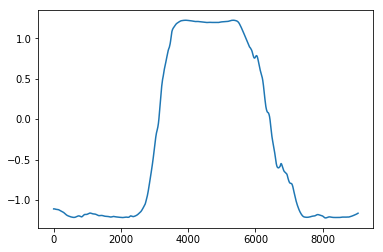

In [17]:
plt.plot(df.loc[10]);

In [0]:
tdf = df.T

In [23]:
print(tdf.shape)
tdf.head()

(9052, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-1.150933,-1.150898,-1.150791,-1.150386,-1.149468,-1.147726,-1.144761,-1.140123,-1.133236,-1.123473,-1.110167,-1.092637,-1.070127,-1.041943,-1.007369,-0.965776,-0.916679,-0.859701,-0.794620,-0.721465,-0.640097,-0.551547,-0.456031,-0.354431,-0.247780,-0.137225,-0.024060,0.090410,0.204714,0.317621,0.427747,0.534120,0.635604,0.731541,0.821051,0.903815,0.979513,1.048191,1.109780,1.164606,...,1.212439,1.164577,1.109760,1.048210,0.979542,0.903805,0.820901,0.731321,0.635409,0.533910,0.427471,0.317229,0.204177,0.089670,-0.024985,-0.138412,-0.249289,-0.356343,-0.458422,-0.554871,-0.644246,-0.726304,-0.800550,-0.866856,-0.925254,-0.975905,-1.019234,-1.055753,-1.086017,-1.110736,-1.130574,-1.146211,-1.158316,-1.167512,-1.174352,-1.179332,-1.182814,-1.185121,-1.186555,-1.187205
1,-1.150782,-1.150749,-1.150648,-1.150251,-1.149344,-1.147615,-1.144665,-1.140042,-1.133172,-1.123427,-1.110140,-1.092627,-1.070135,-1.041967,-1.007408,-0.965829,-0.916743,-0.859774,-0.794701,-0.721551,-0.640186,-0.551637,-0.456120,-0.354517,-0.247861,-0.137301,-0.024128,0.090350,0.204663,0.317579,0.427714,0.534097,0.635590,0.731534,0.821053,0.903823,0.979526,1.048209,1.109802,1.164631,...,1.212466,1.164602,1.109782,1.048228,0.979556,0.903812,0.820902,0.731315,0.635395,0.533886,0.427439,0.317188,0.204126,0.089610,-0.025053,-0.138488,-0.249371,-0.356430,-0.458512,-0.554963,-0.644338,-0.726393,-0.800635,-0.866935,-0.925324,-0.975964,-1.019282,-1.055788,-1.086037,-1.110742,-1.130564,-1.146186,-1.158277,-1.167459,-1.174286,-1.179255,-1.182727,-1.185027,-1.186457,-1.187104
2,-1.150482,-1.150455,-1.150365,-1.149984,-1.149099,-1.147396,-1.144474,-1.139884,-1.133048,-1.123338,-1.110086,-1.092609,-1.070151,-1.042015,-1.007485,-0.965932,-0.916869,-0.859920,-0.794861,-0.721721,-0.640362,-0.551815,-0.456295,-0.354686,-0.248021,-0.137448,-0.024261,0.090233,0.204564,0.317498,0.427651,0.534051,0.635562,0.731522,0.821055,0.903838,0.979553,1.048245,1.109846,1.164680,...,1.212519,1.164651,1.109826,1.048264,0.979583,0.903828,0.820905,0.731303,0.635366,0.533841,0.427375,0.317106,0.204026,0.089493,-0.025187,-0.138637,-0.249532,-0.356601,-0.458689,-0.555143,-0.644518,-0.726569,-0.800802,-0.867089,-0.925462,-0.976082,-1.019377,-1.055857,-1.086079,-1.110754,-1.130546,-1.146139,-1.158200,-1.167355,-1.174157,-1.179104,-1.182558,-1.184843,-1.186263,-1.186905
3,-1.150045,-1.150026,-1.149953,-1.149596,-1.148741,-1.147075,-1.144196,-1.139652,-1.132866,-1.123208,-1.110008,-1.092582,-1.070174,-1.042085,-1.007598,-0.966084,-0.917054,-0.860132,-0.795094,-0.721969,-0.640618,-0.552073,-0.456550,-0.354932,-0.248253,-0.137662,-0.024454,0.090064,0.204420,0.317381,0.427561,0.533987,0.635522,0.731507,0.821061,0.903862,0.979593,1.048298,1.109910,1.164752,...,1.212596,1.164723,1.109890,1.048318,0.979623,0.903852,0.820910,0.731287,0.635327,0.533777,0.427285,0.316988,0.203882,0.089323,-0.025381,-0.138852,-0.249766,-0.356850,-0.458948,-0.555407,-0.644781,-0.726825,-0.801046,-0.867315,-0.925664,-0.976256,-1.019517,-1.055959,-1.086140,-1.110773,-1.130521,-1.146070,-1.158089,-1.167204,-1.173969,-1.178884,-1.182311,-1.184576,-1.185981,-1.186616
4,-1.149483,-1.149475,-1.149423,-1.149097,-1.148282,-1.146664,-1.143840,-1.139356,-1.132633,-1.123041,-1.109909,-1.092549,-1.070205,-1.042175,-1.007744,-0.966279,-0.917291,-0.860404,-0.795393,-0.722287,-0.640946,-0.552404,-0.456875,-0.355245,-0.248548,-0.137934,-0.024698,0.089850,0.204239,0.317234,0.427448,0.533908,0.635475,0.731490,0.821070,0.903896,0.979646,1.048368,1.109993,1.164844,...,1.212695,1.164815,1.109973,1.048388,0.979676,0.903886,0.820919,0.731269,0.635280,0.533697,0.427172,0.316841,0.203700,0.089108,-0.025627,-0.139127,-0.250065,-0.357167,-0.459279,-0.555745,-0.645118,-0.727155,-0.801359,-0.867606,-0.925924,-0.976479,-1.019697,

In [30]:
rows = np.random.choice(tdf.index.values, 3016, replace=False)
sampled_df = tdf.ix[rows]
print(sampled_df.shape)

(3016, 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [0]:
'''
rows = random.sample(tdf.index, 3016)
sampled_df = tdf.ix[rows]
print(sampled_df.shape)
'''

In [0]:
sampled_df = sampled_df.sort_index()

(100, 3016)


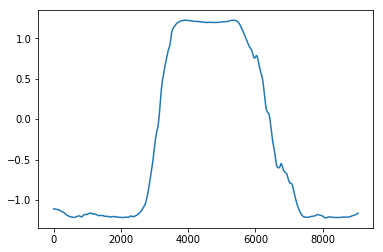

In [38]:
df = sampled_df.T
print(df.shape)

plt.plot(df.loc[10]);

In [39]:
df.head()

,0,3,4,11,14,15,16,18,20,23,33,35,39,48,49,52,62,69,73,74,77,80,84,92,93,96,100,111,112,114,116,122,123,126,127,128,129,132,141,144,...,8920,8921,8924,8925,8929,8943,8944,8949,8952,8956,8960,8961,8962,8963,8965,8968,8969,8971,8980,8983,8988,8991,8992,8993,8995,9002,9011,9013,9016,9017,9020,9021,9022,9026,9031,9041,9042,9044,9049,9051
0,-1.150933,-1.150045,-1.149483,-1.143771,-1.141575,-1.141005,-1.140533,-1.139890,-1.139643,-1.139919,-1.143632,-1.144505,-1.146259,-1.150541,-1.151048,-1.152560,-1.156699,-1.158557,-1.159474,-1.159699,-1.160362,-1.160998,-1.161784,-1.163169,-1.163325,-1.163760,-1.164234,-1.165134,-1.165235,-1.165472,-1.165758,-1.166948,-1.167193,-1.168006,-1.168302,-1.168612,-1.168934,-1.169984,-1.173911,-1.175464,...,-1.640820,-1.640263,-1.638412,-1.637738,-1.634775,-1.620127,-1.618760,-1.611302,-1.606389,-1.599418,-1.592014,-1.590097,-1.588153,-1.586182,-1.582155,-1.575895,-1.573748,-1.569364,-1.548317,-1.541035,-1.529050,-1.522110,-1.519852,-1.517623,-1.513250,-1.498643,-1.480566,-1.476602,-1.470725,-1.468790,-1.463074,-1.461199,-1.459340,-1.452047,-1.443171,-1.426792,-1.425429,-1.422992,-1.419094,-1.418599
1,-1.150898,-1.150026,-1.149475,-1.143874,-1.141723,-1.141167,-1.140705,-1.140079,-1.139843,-1.140123,-1.143799,-1.144662,-1.146393,-1.150614,-1.151114,-1.152602,-1.156674,-1.158498,-1.159397,-1.159618,-1.160267,-1.160890,-1.161660,-1.163017,-1.163171,-1.163597,-1.164064,-1.164955,-1.165055,-1.165289,-1.165572,-1.166743,-1.166984,-1.167784,-1.168076,-1.168380,-1.168698,-1.169731,-1.173605,-1.175139,...,-1.631247,-1.630697,-1.628870,-1.628207,-1.625289,-1.610912,-1.609572,-1.602263,-1.597449,-1.590621,-1.583370,-1.581493,-1.579589,-1.577659,-1.573715,-1.567587,-1.565485,-1.561191,-1.540583,-1.533450,-1.521711,-1.514912,-1.512700,-1.510516,-1.506230,-1.491914,-1.474188,-1.470299,-1.464534,-1.462635,-1.457025,-1.455186,-1.453361,-1.446201,-1.437486,-1.421396,-1.420058,-1.417663,-1.413833,-1.413347
2,-1.150791,-1.149953,-1.149423,-1.144041,-1.141980,-1.141448,-1.141008,-1.140415,-1.140199,-1.140487,-1.144090,-1.144931,-1.146618,-1.150719,-1.151203,-1.152645,-1.156583,-1.158340,-1.159205,-1.159416,-1.160040,-1.160637,-1.161375,-1.162677,-1.162824,-1.163235,-1.163688,-1.164562,-1.164660,-1.164888,-1.165163,-1.166298,-1.166532,-1.167306,-1.167588,-1.167883,-1.168190,-1.169192,-1.172958,-1.174454,...,-1.612346,-1.611809,-1.610032,-1.609387,-1.606562,-1.592722,-1.591435,-1.584420,-1.579803,-1.573256,-1.566307,-1.564509,-1.562684,-1.560835,-1.557057,-1.551187,-1.549173,-1.545061,-1.525317,-1.518481,-1.507225,-1.500705,-1.498582,-1.496487,-1.492375,-1.478633,-1.461602,-1.457863,-1.452318,-1.450491,-1.445092,-1.443322,-1.441565,-1.434669,-1.426271,-1.410755,-1.409464,-1.407154,-1.403459,-1.402990
3,-1.150386,-1.149596,-1.149097,-1.144036,-1.142107,-1.141611,-1.141203,-1.140658,-1.140471,-1.140770,-1.144261,-1.145071,-1.146692,-1.150615,-1.151076,-1.152450,-1.156189,-1.157849,-1.158662,-1.158861,-1.159446,-1.160007,-1.160697,-1.161919,-1.162057,-1.162446,-1.162877,-1.163725,-1.163820,-1.164039,-1.164304,-1.165386,-1.165609,-1.166344,-1.166613,-1.166893,-1.167186,-1.168140,-1.171747,-1.173187,...,-1.584400,-1.583883,-1.582180,-1.581565,-1.578878,-1.565832,-1.564624,-1.558042,-1.553715,-1.547583,-1.541079,-1.539395,-1.537688,-1.535958,-1.532424,-1.526932,-1.525049,-1.521203,-1.502730,-1.496331,-1.485787,-1.479676,-1.477687,-1.475722,-1.471866,-1.458969,-1.442963,-1.439445,-1.434224,-1.432503,-1.427417,-1.425747,-1.424091,-1.417586,-1.409656,-1.394990,-1.393769,-1.391583,-1.388089,-1.387644
4,-1.149468,-1.148741,-1.148282,-1.143636,-1.141876,-1.141427,-1.141059,-1.140576,-1.140425,-1.140737,-1.144078,-1.144847,-1.146382,-1.150069,-1.150502,-1.151786,-1.155268,-1.156801,-1.157548,-1.157730,-1.158266,-1.158778,-1.159409,-1.160526,-1.160654,-1.161013,-1.161416,-1.162230,-1.162321,-1.162530,-1.162780,-1.163794,-1.164001,-1.164688,-1.164938,-1.165200,-1.165473,-1.166365,-1.169764,-1.171129,...,-1.547963,-1.547474,-1.545871,-1.5